# [Github Link](https://github.com/rednithin/7thSemLabs)

# Program 1

In [1]:
from csv import reader
from pprint import pprint

with open("1-dataset.csv") as f:
    dataset = [row[:-1] for row in reader(f) if row[-1] == "Yes"]

hypothesis = dataset[0][:]
for row in dataset[1:]:
    hypothesis = ["?" if tup[0] != tup[1] else tup[0]
                  for tup in zip(hypothesis, row)]
print(hypothesis)

['Sunny', 'Warm', '?', 'Strong', '?', '?']


# Program 2

In [2]:
from csv import reader
from pprint import pprint


def classify(hypo, row):
    for a, b in zip(hypo, row):
        if not(a == '?' or a == b):
            return 'No'
    return 'Yes'


with open("1-dataset.csv") as f:
    dataset = [row for row in reader(f)]

positive_dataset = [row[:-1] for row in dataset if row[-1] == "Yes"]
negative_dataset = [row[:-1] for row in dataset if row[-1] == "No"]
hypo_len = len(positive_dataset[0])
specific_hypothesis = positive_dataset[0][:]
generic_hypothesis = [['?'] * hypo_len]

for row in positive_dataset[1:]:
    specific_hypothesis = ["?" if tup[0] != tup[1] else tup[0]
                           for tup in zip(specific_hypothesis, row)]

for row in negative_dataset:
    newHypothesis = []
    for hypo in generic_hypothesis:
        if classify(hypo, row) == 'Yes':
            candidates = [hypo[:] for _ in range(hypo_len)]
            for i in range(hypo_len):
                if candidates[i][i] == '?':
                    candidates[i][i] = specific_hypothesis[i]
            newHypothesis += candidates
    generic_hypothesis += newHypothesis
    generic_hypothesis = [x for x in generic_hypothesis if classify(x, row) == 'No']

print(specific_hypothesis)
print(generic_hypothesis)


['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


# Program 3

In [3]:
import numpy as np
from csv import reader
from math import log2
from collections import Counter
from pprint import pprint

YES, NO = "Y", "N"


class Node:
    def __init__(self, label):
        self.label = label
        self.branches = {}


def entropy(data):
    total, positive, negative = len(
        data), (data[:, -1] == YES).sum(), (data[:, -1] == NO).sum()
    entropy = 0
    if positive:
        entropy -= positive / total * log2(positive / total)
    if negative:
        entropy -= negative / total * log2(negative / total)
    return entropy


def gain(s, data, column):
    values = set(data[:, column])
    gain = s
    for value in values:
        sub = data[data[:, column] == value]
        gain -= len(sub) / len(data) * entropy(sub)
    return gain


def bestAttribute(data):
    s = entropy(data)
    g = [gain(s, data, column) for column in range(len(data[0]) - 1)]
    return g.index(max(g))


def id3(data, labels):
    root = Node('Null')
    if entropy(data) == 0:
        root.label = data[0, -1]
    elif len(data[0]) == 1:
        root.label = Counter(data[:, -1]).most_common()[0][0]
    else:
        column = bestAttribute(data)
        root.label = labels[column]
        values = set(data[:, column])
        for value in values:
            nData = np.delete(
                data[data[:, column] == value], column, axis=1)
            nLabels = np.delete(labels, column)
            root.branches[value] = id3(nData, nLabels)
    return root


def getRules(root, rule, rules):
    if not root.branches:
        rules.append(rule[:-2] + "=> " + root.label)
    for value, nRoot in root.branches.items():
        getRules(nRoot, rule + root.label + "=" + value + " ^ ", rules)


def predict(tree, tup):
    if not tree.branches:
        return tree.label
    return predict(tree.branches[tup[tree.label]], tup)


labels = np.array(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

with open('3-dataset.csv') as f:
    data = np.array(list(reader(f)))

tree = id3(data, labels)
rules = []
getRules(tree, "", rules)
pprint(sorted(rules))

tup = {}
for label in labels[:-1]:
    tup[label] = input(label + ": ")

print(predict(tree, tup))


['Outlook=Overcast => Y',
 'Outlook=Rain ^ Wind=F => Y',
 'Outlook=Rain ^ Wind=T => N',
 'Outlook=Sunny ^ Humidity=High => N',
 'Outlook=Sunny ^ Humidity=Normal => Y']
Outlook: Overcast
Temperature: 
Humidity: 
Wind: 
Y


# Program 4

In [4]:
from pprint import pprint
import numpy as np

np.random.seed(5)


def nonlin(x, deriv=False):
    if deriv == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))


n_x, n_h, n_y, lRate = 2, 3, 1, 0.5

W1 = np.random.randn(n_h, n_x)
b1 = np.random.randn(n_h, 1)
W2 = np.random.randn(n_y, n_h)
b2 = np.random.randn(n_y, 1)

dataset = [[2.7810836, 2.550537003, 0],
           [1.465489372, 2.362125076, 0],
           [3.396561688, 4.400293529, 0],
           [1.38807019, 1.850220317, 0],
           [3.06407232, 3.005305973, 0],
           [7.627531214, 2.759262235, 1],
           [5.332441248, 2.088626775, 1],
           [6.922596716, 1.77106367, 1],
           [8.675418651, -0.242068655, 1],
           [7.673756466, 3.508563011, 1]]

for epoch in range(300 + 1):
    total_error = 0
    for example in dataset:
        attrs = np.array(example[:-1]).reshape(-1, 1)
        target = example[-1]

        l0 = attrs
        l1 = nonlin(W1 @ l0 + b1)
        l2 = nonlin(W2 @ l1 + b2)

        l2_error = target - l2
        l2_delta = l2_error * nonlin(l2, deriv=True)

        l1_error = W2.T @ l2_delta
        l1_delta = l1_error * nonlin(l1, deriv=True)

        W2 += lRate * l2_delta @ l1.T
        b2 += lRate * l2_delta
        W1 += lRate * l1_delta @ l0.T
        b1 += lRate * l1_delta

        total_error += np.absolute(l2_error).sum()
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} Error: {total_error}')

print('Final Weights W1 and W2')
pprint(W1)
pprint(W2)
pprint(b1)
pprint(b2)


Epoch: 0 Error: 4.947865303680527
Epoch: 100 Error: 0.794197198281876
Epoch: 200 Error: 0.4993039570506267
Epoch: 300 Error: 0.33155708656192456
Final Weights W1 and W2
array([[ 1.91612562, -2.56298013],
       [ 2.66954077,  0.08924304],
       [-0.68921909,  1.45600405]])
array([[ 6.29558109, -1.526356  , -1.12090469]])
array([[-1.70315673],
       [-0.42983793],
       [ 0.11530049]])
array([[-0.88251241]])


# Program 5

In [5]:
from csv import reader
from pprint import pprint
from random import shuffle, seed
from math import exp, pi, sqrt
from operator import itemgetter
import numpy as np

seed(2)
data = np.array(list(reader(open('5-dataset-alt.csv'))), dtype='float')
shuffle(data)
trainLen = int(.9 * len(data))
trainData, trainTarget = data[:trainLen, : -1], data[:trainLen, -1]
testData, testTarget = data[trainLen:, : -1], data[trainLen:, -1]


def safe_div(x, y):
    return x / y if y != 0 else 0


def getProbabilty(x, mean, std):
    exponent = exp(-safe_div((x - mean) ** 2, 2 * std ** 2))
    return safe_div(1, sqrt(2 * pi) * std) * exponent


classes = {}
for attrs, target in zip(trainData, trainTarget):
    if target not in classes:
        classes[target] = []
    classes[target].append(attrs)

summaries = {}
for cls in classes.keys():
    summaries[cls] = []
    for column in zip(*classes[cls]):
        summaries[cls].append((np.mean(column), np.std(column)))

correct = 0
for attrs, target in zip(testData, testTarget):
    probabilty = {}
    for cls in classes.keys():
        probabilty[cls] = 1
        for i, (mean, std) in enumerate(summaries[cls]):
            probabilty[cls] *= getProbabilty(attrs[i], mean, std)

    cls = sorted(probabilty.items(), key=itemgetter(1), reverse=True)[0][0]
    print(f'Actual: {target} \tPredicted: {cls}')
    if cls == target:
        correct += 1

print(f'Accuracy {correct/len(testData)}')


Actual: 10.0 	Predicted: 10.0
Actual: 5.0 	Predicted: 5.0
Actual: 10.0 	Predicted: 5.0
Actual: 10.0 	Predicted: 10.0
Actual: 10.0 	Predicted: 10.0
Actual: 0.0 	Predicted: 0.0
Actual: 0.0 	Predicted: 0.0
Actual: 5.0 	Predicted: 5.0
Actual: 5.0 	Predicted: 5.0
Actual: 5.0 	Predicted: 5.0
Actual: 0.0 	Predicted: 0.0
Actual: 5.0 	Predicted: 5.0
Actual: 0.0 	Predicted: 0.0
Actual: 0.0 	Predicted: 0.0
Actual: 0.0 	Predicted: 0.0
Accuracy 0.9333333333333333


# Program 6

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

c, t = CountVectorizer(), TfidfTransformer()

trainTr = t.fit_transform(c.fit_transform(train.data))
testTr = t.transform(c.transform(test.data))

model = MultinomialNB()
model.fit(trainTr, train.target)
predicted = model.predict(testTr)

print('Accuracy : ', accuracy_score(test.target, predicted), sep='\n')
print('Classification Report : ', classification_report(
    test.target, predicted, target_names=test.target_names), sep='\n')
print('Confusion Matrix : ', confusion_matrix(test.target, predicted), sep='\n')


Accuracy : 
0.8348868175765646
Classification Report : 
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

           avg / total       0.88      0.83      0.84      1502

Confusion Matrix : 
[[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


# Program 7

In [7]:
from bayespy.nodes import Dirichlet, Categorical, MultiMixture
from csv import reader
from pprint import pprint
import numpy as np

with open('7-dataset.csv') as f:
    dataset = np.array(list(reader(f)))

enum = [list(set(column)) for column in dataset.T]

dataset = np.array([[enum[i].index(j)
                     for i, j in enumerate(row)] for row in dataset])

n = len(dataset)
categoricals = []

for i in range(len(enum) - 1):
    dirichlet = Dirichlet(np.ones(len(enum[i])))
    categoricals.append(Categorical(dirichlet, plates=(n,)))
    categoricals[i].observe(dataset[:, i])

target = Dirichlet(np.ones(2), plates=tuple([len(x) for x in enum[:-1]]))
model = MultiMixture(categoricals, Categorical, target)
model.observe(dataset[:, -1])
target.update()


tup = [enum[i].index(j)
       for i, j in enumerate(input('Tuple : ').split(','))]
result = MultiMixture(tup, Categorical, target).get_moments()[
    0][enum[-1].index("Y")]
print(result)


/opt/anaconda/lib/python3.7/site-packages/bayespy/inference/vmp/nodes/categorical.py:107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  u0[[np.arange(np.size(x)), np.ravel(x)]] = 1


Tuple : SSC,M,Y,M,Sedetary,H
0.8175744761936437


/opt/anaconda/lib/python3.7/site-packages/bayespy/inference/vmp/nodes/categorical.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  u0[[np.arange(np.size(x)), np.ravel(x)]] = 1


# Program 8

Kmeans 0.5525919445213675
GMM 0.5009470349898782


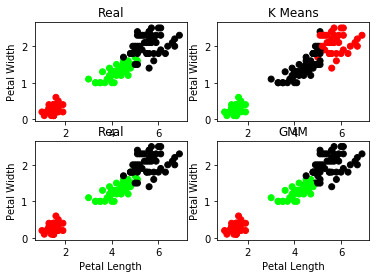

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

colormap = np.array(['red', 'lime', 'black'])
iris = load_iris()
X, Y = iris.data, iris.target

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmmY = gmm.predict(X)

print('Kmeans', silhouette_score(X, kmeans.labels_))
print('GMM', silhouette_score(X, gmmY))


def plot(i, title, targets):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 2], X[:, 3], c=colormap[targets])
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')


plot(1, 'Real', Y)
plot(2, 'K Means', kmeans.labels_)
plot(3, 'Real', Y)
plot(4, 'GMM', gmmY)

plt.show()


# Program 9

In [9]:
import numpy as np
from random import shuffle, seed
from csv import reader
from collections import Counter

seed(4)

with open('9-dataset.csv') as f:
    dataset = np.array(list(reader(f)))
    shuffle(dataset)

trainLen = int(0.8 * len(dataset))
trainDataset, trainTarget = np.array(
    dataset[:trainLen, :-1], dtype='float'), dataset[:trainLen, -1]
testDataset, testTarget = np.array(
    dataset[trainLen:, :-1], dtype='float'), dataset[trainLen:, -1]

k = 5
correct = 0
for row, target in zip(testDataset, testTarget):
    eds = [np.sum((row - x) ** 2) for x in trainDataset]
    kNearest = np.array(sorted(zip(eds, trainTarget))[:k])[:, -1]
    predicted = Counter(kNearest).most_common()[0][0]

    print(f'Actual: {target.ljust(15)} \t\tPredicted: {predicted}')
    if predicted == target:
        correct += 1

print(f"Accuracy : {correct/len(testTarget)}")


Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-virginica  		Predicted: Iris-virginica
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-virginica  		Predicted: Iris-versicolor
Actual: Iris-versicolor 		Predicted: Iris-versicolor
Actual: Iris-setosa     		Predicted: Iris-setosa
Actual: Iris-versicolor 		

# Program 10 + Alternate

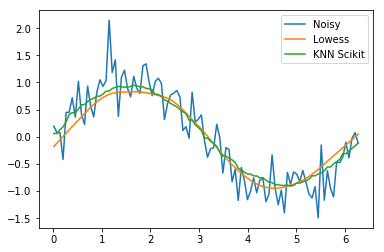

In [10]:
from sklearn.neighbors import KNeighborsRegressor
import pylab as pl
from math import pi, ceil
import numpy as np

np.random.seed(2)


def lowess(x, y, f=2. / 3., iter=3):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]

    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3

    yest = np.zeros(n)
    delta = np.ones(n)
    for _ in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = np.linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest


n = 100
x = np.linspace(0, 2 * pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)

f = 0.25
yest = lowess(x, y, f=f, iter=3)

'''------------ALTERNATE--------------'''
n = 200
x = np.linspace(-pi, 3 * pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)

neigh = KNeighborsRegressor(n_neighbors=30)
neigh.fit(x.reshape(-1, 1), y.reshape(-1, 1))
newY = neigh.predict(x.reshape(-1, 1))[50:150]
x, y = x[50:150], y[50:150]

pl.clf()
pl.plot(x, y, label='Noisy')
pl.plot(x, yest, label='Lowess')
pl.plot(x, newY, label='KNN Scikit')
pl.legend(loc='upper right')
pl.show()
